# Importing Libraries & Loading Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from statsmodels.graphics.correlation import plot_corr

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Ajust the configurations of the plot we will create

pd.options.mode.chained_assignment = None

from google.colab import files
uploaded = files.upload()


Saving movies.csv to movies (3).csv


In [ ]:
df = pd.read_csv("movies.csv")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Exploring the Dataset

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.0,2000.0,2010.0,2.020000e+03
score,7665.0,6.390411e+00,9.688416e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,7665.0,8.810850e+04,1.633238e+05,7.0,9100.0,33000.0,93000.0,2.400000e+06
budget,5497.0,3.558988e+07,4.145730e+07,3000.0,10000000.0,20500000.0,45000000.0,3.560000e+08
gross,7479.0,7.850054e+07,1.657251e+08,309.0,4532055.5,20205757.0,76016691.5,2.847246e+09
runtime,7664.0,1.072616e+02,1.858125e+01,55.0,95.0,104.0,116.0,3.660000e+02


In [ ]:
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


# Data Cleaning & Preprocessing

In [ ]:
for col in df.columns:
  missing = df.isnull().sum()
  missing = missing[missing > 0]
  print(missing)

df = df.dropna(how='any',axis=0)

rating        77
released       2
score          3
votes          3
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
rating        77
released       2
score          3
votes          3
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
rating        77
released       2
score          3
votes          3
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
rating        77
released       2
score          3
votes          3
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
rating        77
released       2
score          3
votes          3
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [ ]:
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(0)

In [ ]:
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [ ]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df = df.drop('year', axis=1)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [ ]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [ ]:
df.sort_values(by=['gross'], ascending=False).head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [ ]:
df["rating"].value_counts()

,count
rating,
R,2597
PG-13,1729
PG,907
G,111
Not Rated,44
Unrated,17
NC-17,12
TV-MA,2
Approved,1


In [ ]:
df["rating"] = df["rating"].replace({"Unrated": "Not Rated"})
df['rating'].value_counts()

,count
rating,
R,2597
PG-13,1729
PG,907
G,111
Not Rated,61
NC-17,12
TV-MA,2
Approved,1
X,1


# Correlation Analysis

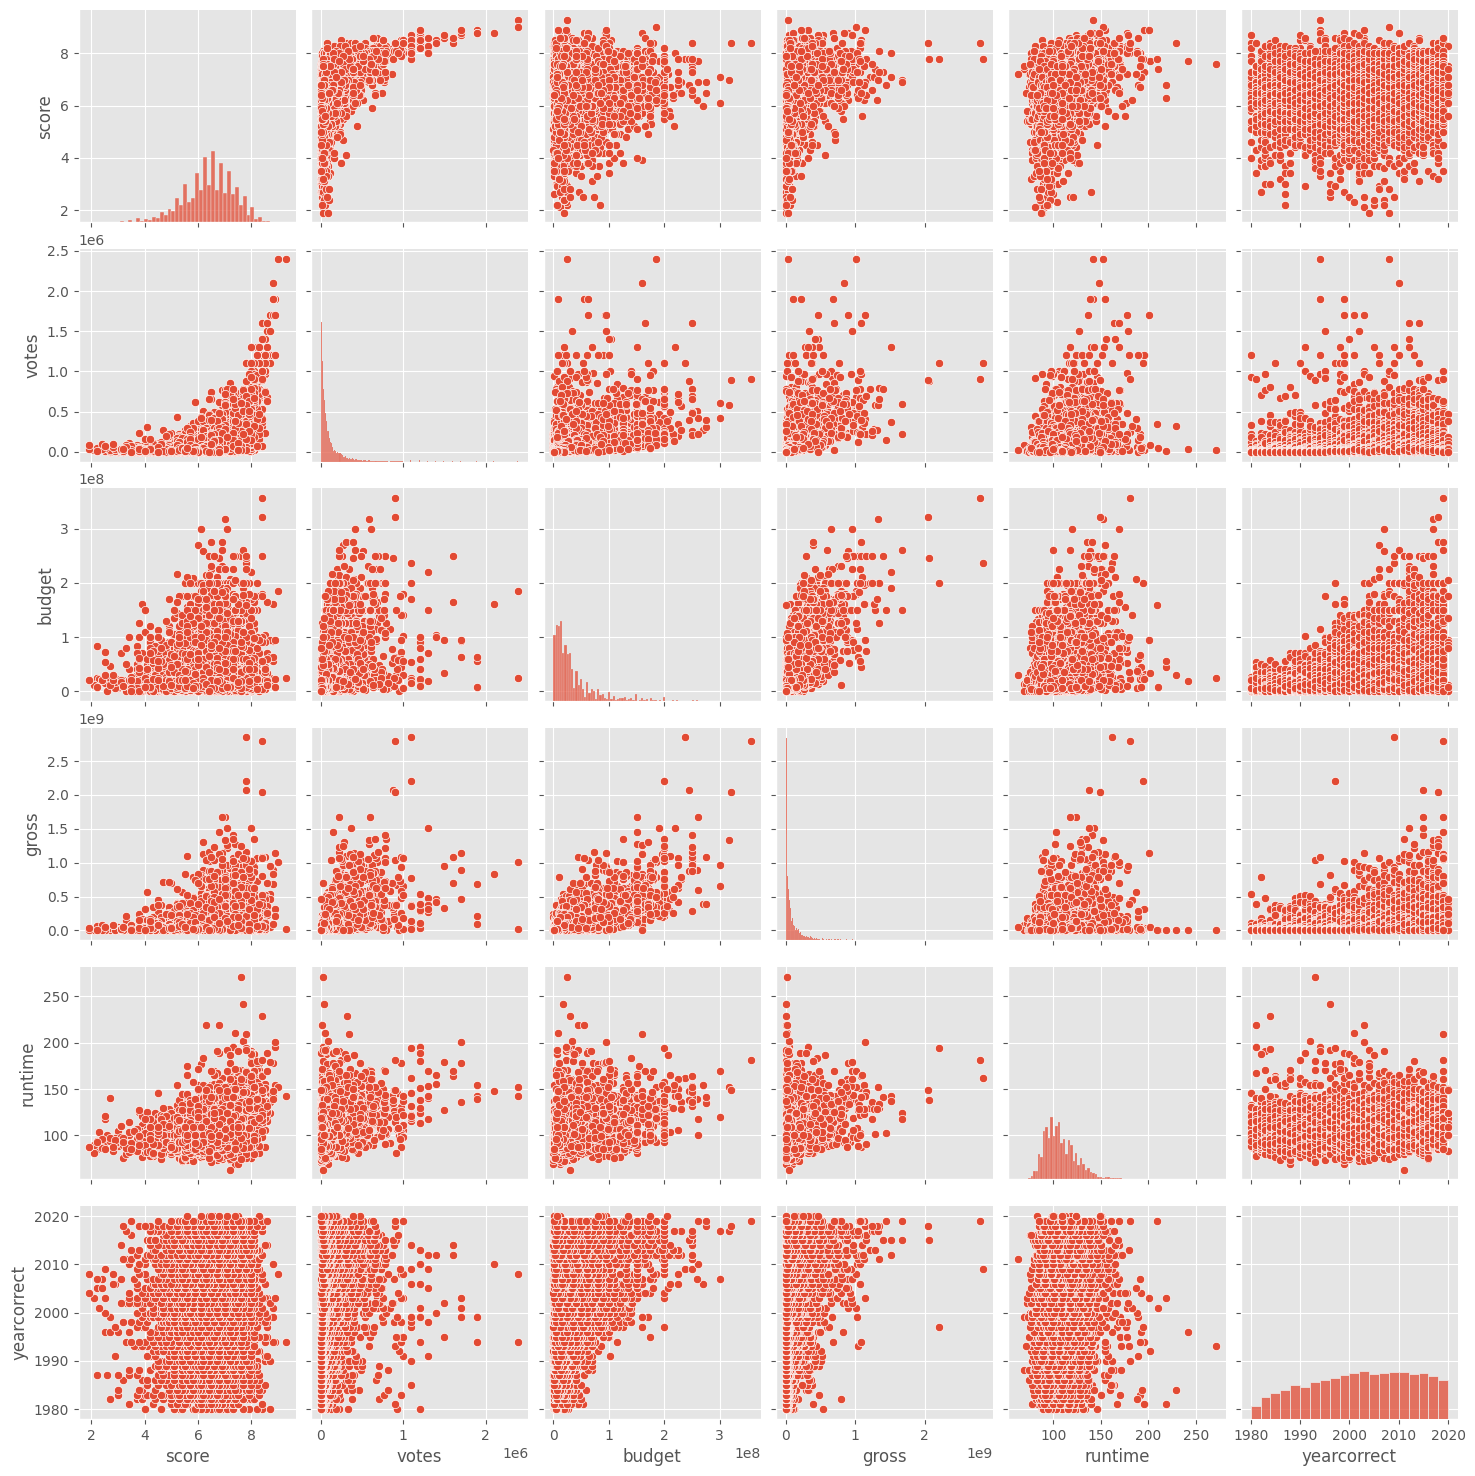

In [ ]:
sns.pairplot(df)

,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


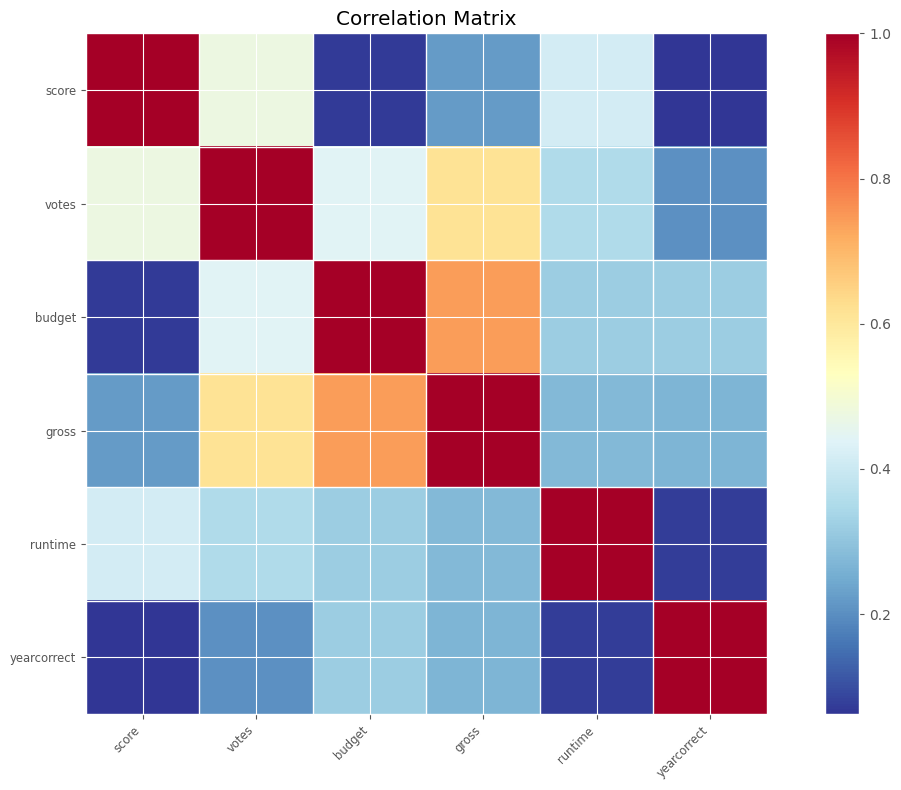

In [ ]:
C = df.corr(numeric_only=True)
display(C)

plot_corr(C, xnames=C.columns)
plt.show()

Strong positive correlation between Budget and Gross Revenue

Strong positive correlation between Votes and Gross Revenue

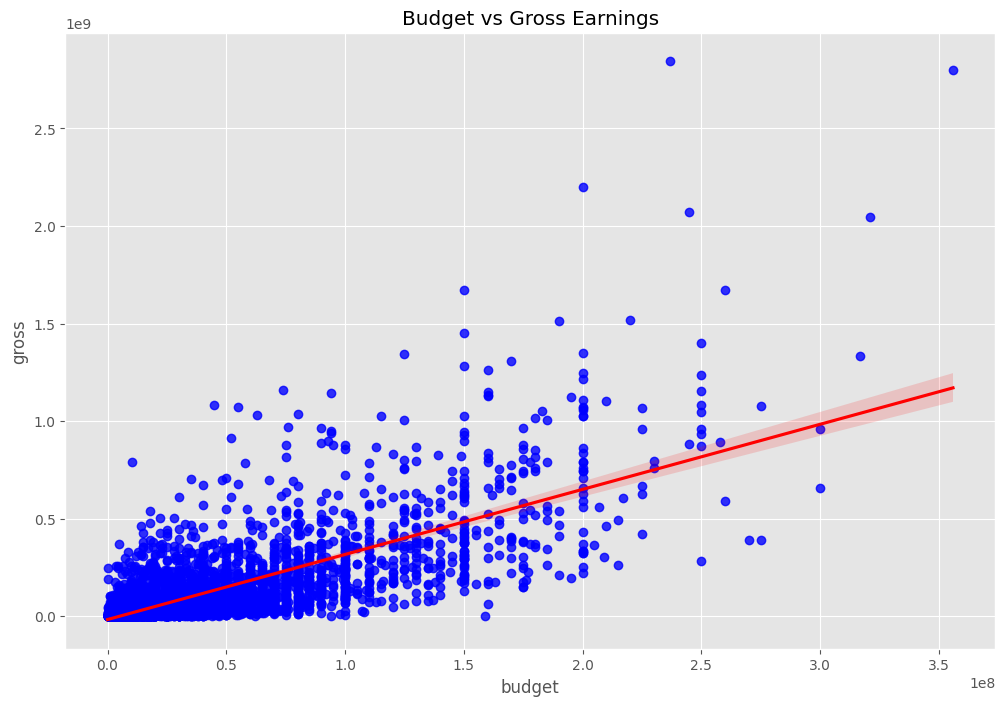

In [ ]:
# Scatter plot with regression line
sns.regplot(df, x='budget', y= 'gross', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Budget vs Gross Earnings')
plt.show()

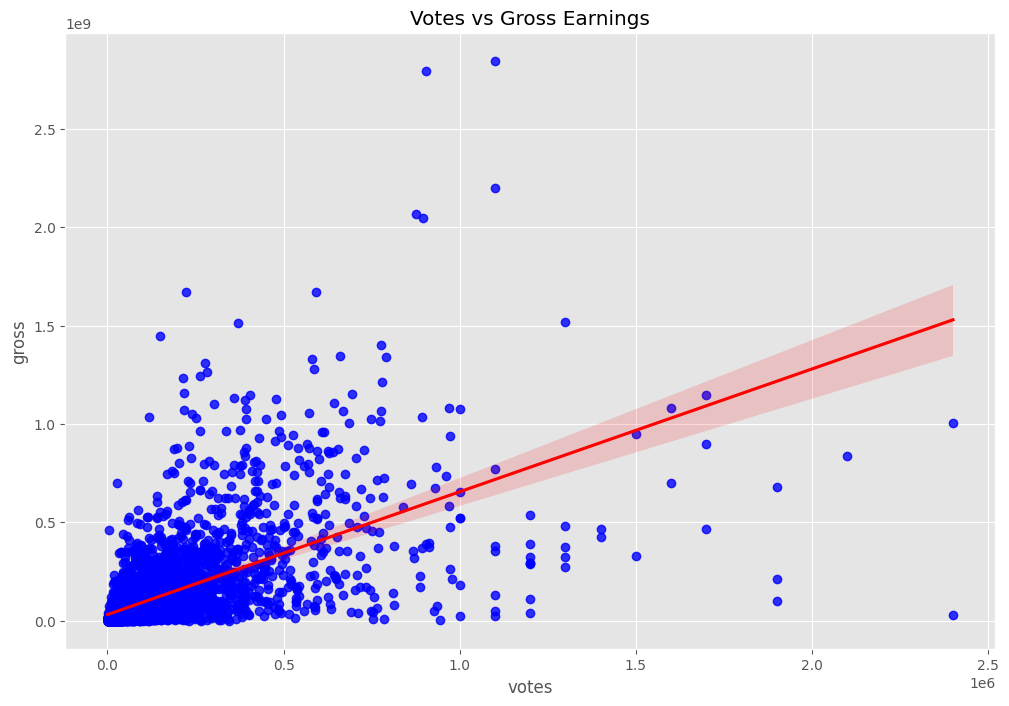

In [ ]:
sns.regplot(df, x='votes', y= 'gross', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Votes vs Gross Earnings')
plt.show()